# SVM_RBF_Final

In [1]:
from __future__ import print_function
import time
import sklearn
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import preprocessing
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale,RobustScaler,StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from matplotlib import cm
from sklearn.manifold import TSNE
from sklearn.datasets import make_blobs
import sklearn.metrics as metrics
import sklearn.metrics as metrics
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.model_selection import ParameterGrid
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn import tree

## Method 1 without PCA:

Oscar_92:
- 75% train
- 25% test

In [2]:
raw = pd.read_csv('cleaned.csv')

#### Split our dataset

In [3]:
train, test = train_test_split(raw, test_size=0.25)

##### Pre-processing Dataset

In [4]:
le = preprocessing.LabelEncoder()
title = list(train['title'])
le.fit(title)
encoded_titles = le.transform(title)
train['title'] = encoded_titles

# example of a normalization
columns = ['title','runtime', 'imdb_score', 'imdb_votes', 'user_review_count', 'critic_review_count','critic_overall_score','critic_positive_score','critic_mixed_score','critic_negative_score','user_overall_score','user_positive_score','user_mixed_score','user_negative_score','#_of_nominations','#_of_wins']

# convert numerical-object to numericals
for col in columns:
    train[col] = train[col].replace('[^.0-9]', '', regex=True,).astype(float).fillna(0.0)

    # clean textual classes
for col in train.select_dtypes(include='object').columns:
    train[col] = train[col].str.upper().replace('Z_','',regex=True).replace('[^A-Z]','',regex=True)
        
data_types = {f:t for f,t in zip(train.columns,train.dtypes)}

# copy df
df = train.copy()
df = df.drop(labels=['title'],axis=1)
df = df.drop(labels=['#_of_wins'],axis=1)

#print(df)
data_meta = pd.DataFrame(df.nunique(),columns=['num'],index=None).sort_values('num').reset_index()
data_meta.columns = ['name','num']
data_meta['type'] = 'numerical'
#print(data_meta)

#print(data_meta)

#data_meta.loc[(data_meta['num']<=15) & (~data_meta['name'].isin(['category','name','winner'])),'type']='categorical'
data_meta.loc[data_meta['name'].isin(['category','name']),'type']='categorical'

categorical_features = list(data_meta.loc[data_meta['type']=='categorical','name'])
numerical_features = list(data_meta.loc[data_meta['type']=='numerical','name'])
#print(numerical_features)


# Standard Scaled "mean normalisation"
scaler = StandardScaler()
scaler.fit(df[numerical_features])
#print("Feature Means:\t",[f"{x:.2}" for x in scaler.mean_])
numerical_data = scaler.transform(df[numerical_features])
numerical_data = pd.DataFrame(numerical_data,index=df.index,columns=numerical_features)
numerical_data[:2]

#print(numerical_data)

scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(df[numerical_features])
numerical_data = scaler.transform(df[numerical_features])
numerical_data = pd.DataFrame(numerical_data,index=df.index,columns=numerical_features)
numerical_data[:2]


# nominal_features = [c for c in categorical_features]
# #print("Nominals:\n",nominal_features)

# nominal_data = list()
# for i,x in df[nominal_features].nunique().iteritems():
#     if x <= 2:
#         nominal_data.append(pd.get_dummies(df[[i]],drop_first=True))
#     elif x > 2:
#         nominal_data.append(pd.get_dummies(df[[i]],drop_first=False))
        
#nominal_data = pd.concat(nominal_data,axis=1)

# transformed and scaled dataset
Xy_train = pd.concat([numerical_data],axis=1)
#print(f'Data min:max {Xy_scaled.min().min(),Xy_scaled.max().max()}')

# original data
Xy_original = df[numerical_features].copy()

In [5]:
titles2 = list(test['title'])
le.fit(titles2)
encoded_titles2 = le.transform(titles2)
test['title'] = encoded_titles2

# example of a normalization
columns = ['title','runtime', 'imdb_score', 'imdb_votes', 'user_review_count', 'critic_review_count','critic_overall_score','critic_positive_score','critic_mixed_score','critic_negative_score','user_overall_score','user_positive_score','user_mixed_score','user_negative_score','#_of_nominations','#_of_wins']

# convert numerical-object to numericals
for col in columns:
    test[col] = test[col].replace('[^.0-9]', '', regex=True,).astype(float).fillna(0.0)

    # clean textual classes
for col in test.select_dtypes(include='object').columns:
    test[col] = test[col].str.upper().replace('Z_','',regex=True).replace('[^A-Z]','',regex=True)
        
data_types = {f:t for f,t in zip(test.columns,test.dtypes)}

# copy df
dp = test.copy()
dp = dp.drop(labels=['title'],axis=1)
dp = dp.drop(labels=['#_of_wins'],axis=1)


data_meta2 = pd.DataFrame(dp.nunique(),columns=['num'],index=None).sort_values('num').reset_index()
data_meta2.columns = ['name','num']
data_meta2['type'] = 'numerical'
#print(data_meta)


#data_meta.loc[(data_meta['num']<=15) & (~data_meta['name'].isin(['category','name','winner'])),'type']='categorical'
data_meta2.loc[data_meta2['name'].isin(['category','name']),'type']='categorical'

#categorical_features2 = list(data_meta2.loc[data_meta2['type']=='categorical','name'])
numerical_features2 = list(data_meta2.loc[data_meta2['type']=='numerical','name'])
#print(numerical_features)


# Standard Scaled "mean normalisation"
scaler2 = StandardScaler()
scaler2.fit(dp[numerical_features2])
#print("Feature Means:\t",[f"{x:.2}" for x in scaler.mean_])
numerical_data2 = scaler2.transform(dp[numerical_features2])
numerical_data2 = pd.DataFrame(numerical_data2,index=dp.index,columns=numerical_features2)
numerical_data2[:2]



scaler2 = MinMaxScaler(feature_range=(0,1))
scaler2.fit(dp[numerical_features2])
numerical_data2 = scaler2.transform(dp[numerical_features2])
numerical_data2 = pd.DataFrame(numerical_data2,index=dp.index,columns=numerical_features2)
numerical_data2[:2]


# nominal_features = [c for c in categorical_features]
# print("Nominals:\n",nominal_features)

# nominal_data = list()
# for i,x in df[nominal_features].nunique().iteritems():
#     if x <= 2:
#         nominal_data.append(pd.get_dummies(df[[i]],drop_first=True))
#     elif x > 2:
#         nominal_data.append(pd.get_dummies(df[[i]],drop_first=False))
        
# nominal_data = pd.concat(nominal_data,axis=1)

# transformed and scaled dataset
Xy_test = pd.concat([numerical_data2],axis=1)
#print(f'Data min:max {Xy_scaled.min().min(),Xy_scaled.max().max()}')

# original data
Xy_original_dp = dp[numerical_features2].copy()

In [6]:
#Match the column index
Xy_train = Xy_train.reindex(columns=sorted(Xy_train.columns))
Xy_test = Xy_test.reindex(columns=sorted(Xy_test.columns))

In [7]:
y_train = train['#_of_wins']
y_train = np.array(y_train)

y_test = test['#_of_wins']
y_test = np.array(y_test)

y_train2=[]
for i in range(len(y_train)):
    if y_train[i]==0:
        y_train2.append(0)
    else:
        y_train2.append(1)
        

y_test2=[]
for i in range(len(y_test)):
    if y_test[i]==0:
        y_test2.append(0)
    else:
        y_test2.append(1)


In [8]:
clf_M1 = tree.DecisionTreeClassifier(class_weight="balanced")
clf_M1.fit(Xy_train,y_train2)

DecisionTreeClassifier(class_weight='balanced')

In [9]:
pred_M1 = clf_M1.predict(Xy_test)

##### Calculating F1-Score

In [10]:
binary = f1_score(y_test2, pred_M1, average='binary')

print('binary F1 score: ',binary)

binary F1 score:  0.662251655629139


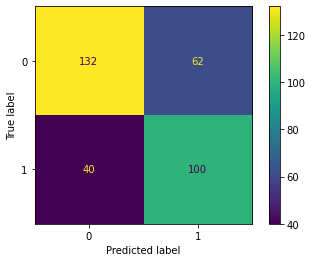

In [11]:
clf = SVC(random_state=0)
clf.fit(Xy_train, y_train2)

SVC(random_state=0)
predictions = clf.predict(Xy_test)
cm2 = confusion_matrix(y_test2, pred_M1, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2,display_labels=clf.classes_)
disp.plot()

plt.show()

##### Accuracy

In [12]:
sklearn.metrics.accuracy_score(y_test2, pred_M1)

0.6946107784431138

# Method 1 with PCA

In [13]:
#reducing dimension using PCA.
#calculates the % of the data we still have of our original
pca_M1_train = PCA(n_components=2)
pca_M1result_train=pca_M1_train.fit_transform(Xy_train)
print('Explained variation per principal component: {}'.format(pca_M1_train.explained_variance_ratio_))
print('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca_M1_train.explained_variance_ratio_)))

Explained variation per principal component: [0.45054316 0.19240649]
Cumulative variance explained by 2 principal components: 64.29%


In [14]:
#reducing dimension using PCA.
#calculates the % of the data we still have of our original
pca_M1_test = PCA(n_components=2)
pca_M1result_test=pca_M1_test.fit_transform(Xy_test)
print('Explained variation per principal component: {}'.format(pca_M1_test.explained_variance_ratio_))
print('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca_M1_test.explained_variance_ratio_)))

Explained variation per principal component: [0.36329199 0.17700669]
Cumulative variance explained by 2 principal components: 54.03%


In [15]:
clf_M1_w = tree.DecisionTreeClassifier(class_weight="balanced")
clf_M1_w.fit(pca_M1result_train, y_train2)

DecisionTreeClassifier(class_weight='balanced')

In [16]:
pred_M1_w = clf_M1_w.predict(pca_M1result_test)

##### Calculating F-1 Score

In [17]:
binary = f1_score(y_test2, pred_M1_w, average='binary')

print('binary F1 score: ',binary)

binary F1 score:  0.3292181069958848


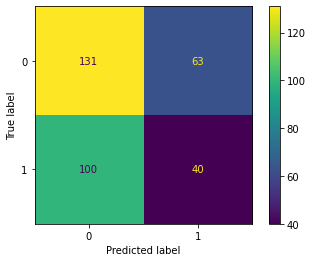

In [18]:
clf = SVC(random_state=0)
clf.fit(pca_M1result_train, y_train2)

SVC(random_state=0)
predictions = clf.predict(pca_M1result_test)
cm2 = confusion_matrix(y_test2, pred_M1_w, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2,display_labels=clf.classes_)
disp.plot()

plt.show()

##### Accuracy

In [19]:
sklearn.metrics.accuracy_score(y_test2, pred_M1_w)

0.5119760479041916

## Method 2 without PCA

In [20]:
Oscar93=pd.read_csv('93rd_test_data.csv')

In [21]:
le = preprocessing.LabelEncoder()
title3 = list(Oscar93['title'])
le.fit(title3)
encoded_titles3 = le.transform(title3)
Oscar93['title'] = encoded_titles3

# example of a normalization
columns = ['title','runtime', 'imdb_score', 'imdb_votes', 'user_review_count', 'critic_review_count','critic_overall_score','critic_positive_score','critic_mixed_score','critic_negative_score','user_overall_score','user_positive_score','user_mixed_score','user_negative_score','#_of_nominations','#_of_wins']

# convert numerical-object to numericals
for col in columns:
    Oscar93[col] = Oscar93[col].replace('[^.0-9]', '', regex=True,).astype(float).fillna(0.0)

    # clean textual classes
for col in Oscar93.select_dtypes(include='object').columns:
    Oscar93[col] = Oscar93[col].str.upper().replace('Z_','',regex=True).replace('[^A-Z]','',regex=True)
        
data_types3 = {f:t for f,t in zip(Oscar93.columns,Oscar93.dtypes)}

# copy df
dp3 = Oscar93.copy()
dp3 = dp3.drop(labels=['title'],axis=1)
dp3 = dp3.drop(labels=['#_of_wins'],axis=1)

#print(df)
data_meta3 = pd.DataFrame(dp3.nunique(),columns=['num'],index=None).sort_values('num').reset_index()
data_meta3.columns = ['name','num']
data_meta3['type'] = 'numerical'
#print(data_meta)

#print(data_meta)

#data_meta.loc[(data_meta['num']<=15) & (~data_meta['name'].isin(['category','name','winner'])),'type']='categorical'
data_meta3.loc[data_meta3['name'].isin(['category','name']),'type']='categorical'

categorical_features3 = list(data_meta3.loc[data_meta3['type']=='categorical','name'])
numerical_features3 = list(data_meta3.loc[data_meta3['type']=='numerical','name'])
#print(numerical_features)


# Standard Scaled "mean normalisation"
scaler3 = StandardScaler()
scaler3.fit(dp3[numerical_features3])
#print("Feature Means:\t",[f"{x:.2}" for x in scaler.mean_])
numerical_data3 = scaler3.transform(dp3[numerical_features3])
numerical_data3 = pd.DataFrame(numerical_data3,index=dp3.index,columns=numerical_features3)
numerical_data3[:2]

#print(numerical_data)

scaler3 = MinMaxScaler(feature_range=(0,1))
scaler3.fit(dp3[numerical_features3])
numerical_data3 = scaler3.transform(dp3[numerical_features3])
numerical_data3 = pd.DataFrame(numerical_data3,index=dp3.index,columns=numerical_features3)
numerical_data3[:2]


# nominal_features = [c for c in categorical_features]
# #print("Nominals:\n",nominal_features)

# nominal_data = list()
# for i,x in df[nominal_features].nunique().iteritems():
#     if x <= 2:
#         nominal_data.append(pd.get_dummies(df[[i]],drop_first=True))
#     elif x > 2:
#         nominal_data.append(pd.get_dummies(df[[i]],drop_first=False))
        
#nominal_data = pd.concat(nominal_data,axis=1)

# transformed and scaled dataset
Oscar93_test = pd.concat([numerical_data3],axis=1)
#print(f'Data min:max {Xy_scaled.min().min(),Xy_scaled.max().max()}')

# original data
Oscar93_original = dp3[numerical_features3].copy()

In [22]:
Oscar93_test = Oscar93_test.reindex(columns=sorted(Oscar93_test.columns))
Xy_train = Xy_train.reindex(columns=sorted(Xy_train.columns))

In [23]:
clf_M2 = tree.DecisionTreeClassifier(class_weight="balanced")
clf_M2.fit(Xy_train, y_train2)

DecisionTreeClassifier(class_weight='balanced')

In [24]:
pred_M2 = clf_M2.predict(Oscar93_test)

In [25]:
Oscar93_y = Oscar93['#_of_wins']
Oy_test = []
for i in range(len(Oscar93_y)):
    if Oscar93_y[i]==0:
        Oy_test.append(0)
    else:
        Oy_test.append(1)

##### Calculating F1-Score

In [26]:
binary = f1_score(Oy_test, pred_M2, average='binary')
print('binary F1 score: ',binary)

binary F1 score:  0.6428571428571429


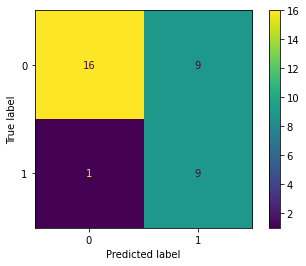

In [27]:
clf = SVC(random_state=0)
clf.fit(Xy_train, y_train2)

SVC(random_state=0)
predictions = clf.predict(Oscar93_test)
cm2 = confusion_matrix(Oy_test, pred_M2, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2,display_labels=clf.classes_)
disp.plot()

plt.show()

In [28]:
sklearn.metrics.accuracy_score(Oy_test, pred_M2)

0.7142857142857143

# Method 2 with PCA

In [29]:
#reducing dimension using PCA.
#calculates the % of the data we still have of our original
pca_O = PCA(n_components=2)
pca_Oresult=pca_O.fit_transform(Oscar93_test)
print('Explained variation per principal component: {}'.format(pca_O.explained_variance_ratio_))
print('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca_O.explained_variance_ratio_)))

Explained variation per principal component: [0.36140031 0.32681626]
Cumulative variance explained by 2 principal components: 68.82%


In [30]:
clf_M2_w = tree.DecisionTreeClassifier(class_weight="balanced")
clf_M2_w.fit(pca_M1result_train, y_train2)

DecisionTreeClassifier(class_weight='balanced')

In [31]:
pred_M2_w = clf_M2_w.predict(pca_Oresult)

##### Calculating F-1 Score

In [32]:
binary = f1_score(Oy_test, pred_M2_w, average='binary')

print('binary F1 score: ',binary)

binary F1 score:  0.4347826086956522


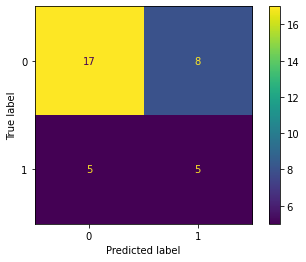

In [33]:
clf = SVC(random_state=0)
clf.fit(pca_M1result_train, y_train2)

SVC(random_state=0)
predictions = clf.predict(pca_Oresult)
cm2 = confusion_matrix(Oy_test, pred_M2_w, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2,display_labels=clf.classes_)
disp.plot()

plt.show()

##### Accuracy

In [34]:
sklearn.metrics.accuracy_score(Oy_test, pred_M2_w)

0.6285714285714286

# Method 3 without PCA

In [35]:
raw2 = pd.read_csv('cleaned.csv')

le = preprocessing.LabelEncoder()
titles5 = list(raw2['title'])
le.fit(titles5)
encoded_titles5 = le.transform(titles5)
raw2['title'] = encoded_titles5

# example of a normalization
columns = ['title','runtime', 'imdb_score', 'imdb_votes', 'user_review_count', 'critic_review_count','critic_overall_score','critic_positive_score','critic_mixed_score','critic_negative_score','user_overall_score','user_positive_score','user_mixed_score','user_negative_score','#_of_nominations','#_of_wins']

# convert numerical-object to numericals
for col in columns:
    raw2[col] = raw2[col].replace('[^.0-9]', '', regex=True,).astype(float).fillna(0.0)

    # clean textual classes
for col in raw2.select_dtypes(include='object').columns:
        raw2[col] = raw2[col].str.upper().replace('Z_','',regex=True).replace('[^A-Z]','',regex=True)
        
data_types5 = {f:t for f,t in zip(raw.columns,raw.dtypes)}

# copy df
df5 = raw2.copy()
df5 = df5.drop(labels=['title'],axis=1)
df5 = df5.drop(labels=['#_of_wins'],axis=1)

data_meta5 = pd.DataFrame(df5.nunique(),columns=['num'],index=None).sort_values('num').reset_index()
data_meta5.columns = ['name','num']
data_meta5['type'] = 'numerical'
#print(data_meta)


#data_meta.loc[(data_meta['num']<=15) & (~data_meta['name'].isin(['category','name','winner'])),'type']='categorical'
data_meta5.loc[data_meta5['name'].isin(['category','name']),'type']='categorical'

categorical_features5 = list(data_meta5.loc[data_meta5['type']=='categorical','name'])
numerical_features5 = list(data_meta5.loc[data_meta5['type']=='numerical','name'])
#print(numerical_features)


# Standard Scaled "mean normalisation"
scaler5 = StandardScaler()
scaler5.fit(df5[numerical_features5])
#print("Feature Means:\t",[f"{x:.2}" for x in scaler.mean_])
numerical_data5 = scaler5.transform(df5[numerical_features5])
numerical_data5 = pd.DataFrame(numerical_data5,index=df5.index,columns=numerical_features5)
numerical_data5[:2]



scaler5 = MinMaxScaler(feature_range=(0,1))
scaler5.fit(df5[numerical_features5])
numerical_data5 = scaler5.transform(df5[numerical_features5])
numerical_data5 = pd.DataFrame(numerical_data5,index=df5.index,columns=numerical_features5)
numerical_data5[:2]


# nominal_features5 = [c for c in categorical_features]
# #print("Nominals:\n",nominal_features)

# nominal_data = list()
# for i,x in df[nominal_features].nunique().iteritems():
#     if x <= 2:
#         nominal_data.append(pd.get_dummies(df[[i]],drop_first=True))
#     elif x > 2:
#         nominal_data.append(pd.get_dummies(df[[i]],drop_first=False))
        
#nominal_data = pd.concat(nominal_data,axis=1)

# transformed and scaled dataset
Xy_scaled_M3 = pd.concat([numerical_data5],axis=1)
#print(f'Data min:max {Xy_scaled.min().min(),Xy_scaled.max().max()}')

# original data
Xy_original_M3 = df5[numerical_features5].copy()

In [36]:
#Match the column index
Xy_M3 = Xy_scaled_M3.reindex(columns=sorted(Xy_scaled_M3.columns))
Oscar93_test = Oscar93_test.reindex(columns=sorted(Oscar93_test.columns))

In [37]:
Xy_M3_train = raw2.copy()
Xy_M3_train = Xy_M3_train['#_of_wins']
Xy_M3_train = np.array(Xy_M3_train)
Xy_M3_train_y =[]
for i in range(len(Xy_M3_train)):
    if Xy_M3_train[i]==0:
        Xy_M3_train_y.append(0)
    else:
        Xy_M3_train_y.append(1)

In [38]:
clf_M3 = tree.DecisionTreeClassifier(class_weight="balanced")
clf_M3.fit(Xy_M3, Xy_M3_train_y)

DecisionTreeClassifier(class_weight='balanced')

In [39]:
pred_M3 = clf_M3.predict(Oscar93_test)

##### Calculating F-1 Score

In [40]:
binary = f1_score(Oy_test, pred_M3, average='binary')

print('binary F1 score: ',binary)

binary F1 score:  0.6428571428571429


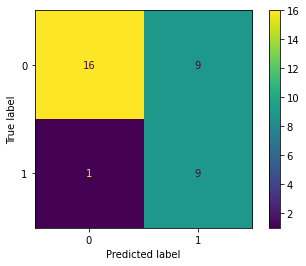

In [41]:
clf = SVC(random_state=0)
clf.fit(Xy_M3, Xy_M3_train_y)

SVC(random_state=0)
predictions = clf.predict(Oscar93_test)
cm2 = confusion_matrix(Oy_test, pred_M3, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2,display_labels=clf.classes_)
disp.plot()

plt.show()

In [42]:
sklearn.metrics.accuracy_score(Oy_test, pred_M3)

0.7142857142857143

# Method 3 with PCA

In [43]:
#reducing dimension using PCA.
#calculates the % of the data we still have of our original
pca_M3 = PCA(n_components=2)
pca_M3result=pca_M3.fit_transform(Xy_M3)
print('Explained variation per principal component: {}'.format(pca_M3.explained_variance_ratio_))
print('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca_M3.explained_variance_ratio_)))

Explained variation per principal component: [0.44986421 0.19022574]
Cumulative variance explained by 2 principal components: 64.01%


In [44]:
clf_M3_w = tree.DecisionTreeClassifier(class_weight="balanced")
clf_M3_w.fit(pca_M3result,Xy_M3_train_y)

DecisionTreeClassifier(class_weight='balanced')

In [45]:
pred_M3_w = clf_M3_w.predict(pca_Oresult)

In [46]:
binary = f1_score(Oy_test, pred_M3_w, average='binary')

print('binary F1 score: ',binary)

binary F1 score:  0.28571428571428564


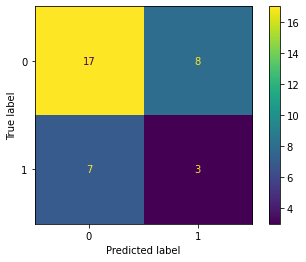

In [47]:
clf = SVC(random_state=0)
clf.fit(pca_M3result, Xy_M3_train_y)

SVC(random_state=0)
predictions = clf.predict(pca_Oresult)
cm2 = confusion_matrix(Oy_test, pred_M3_w, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2,display_labels=clf.classes_)
disp.plot()

plt.show()

In [48]:
sklearn.metrics.accuracy_score(Oy_test, pred_M3_w)

0.5714285714285714